In [1]:
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem.MolStandardize import rdMolStandardize
import pubchempy as pcp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
initial_smi = pd.read_excel(r'../prediction_and_selection/Prediction_initializers_ROR_activ.xlsx')
initial_smi = list(initial_smi['SMILES'])
initial_smi = pd.DataFrame(initial_smi, columns=['SMILES'])
print("Initial data description: ")
print(initial_smi.describe())

print("SMILES used to predict new molecules description: ")
print(initial_smi.describe())

print("Examples of initial structures: ")
print(initial_smi[0:3])

Initial data description: 
                                     SMILES
count                                     5
unique                                    5
top     Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1
freq                                      1
SMILES used to predict new molecules description: 
                                     SMILES
count                                     5
unique                                    5
top     Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1
freq                                      1
Examples of initial structures: 
                                              SMILES
0               CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1
1                Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1
2  CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...


In [3]:
output_smi = pd.read_excel(r'../prediction_and_selection/All_generated_SMILES_SYBA_filtration.xlsx')
output_smi = list(output_smi['SMILES'])
docked_mols = output_smi.copy()
output_smi[0:3]

['CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2',
 'CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12',
 'CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C']

In [4]:
#all_generated = pd.read_excel(r'../prediction_and_selection/)

In [5]:
initial_mol = [Chem.MolFromSmiles(smi) for smi in initial_smi['SMILES']]

In [6]:
output_smi = [Chem.MolFromSmiles(smi) for smi in output_smi]

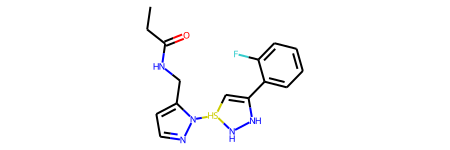

In [7]:
output_smi[0]

In [8]:
largest_Fragment = rdMolStandardize.LargestFragmentChooser()
to_check_in_PUBCHEM = []
standarized_mols = []
for smi in output_smi:
    largest_mol = largest_Fragment.choose(smi) #Mol object is returned
    cannonical = Chem.MolToSmiles(largest_mol, isomericSmiles=False)
    standarized_mols.append(cannonical)
    to_check_in_PUBCHEM.append(cannonical)
standarized_mols[0:3]

['CCC(=O)NCc1ccnn1[SH]1C=C(c2ccccc2F)NN1',
 'CCC(=O)N1CC2C1CC2(C#N)S(=O)c1ccccn1',
 'CCC(=O)N1c2ccn(-c3ncnc(C#N)c3C)c2[SH]1C']

In [9]:
def get_similarity(mol, smi_list):
    sim0 = mol
    sim1 = [Chem.MolFromSmiles(smiles) for smiles in smi_list]
    sim00 = Chem.RDKFingerprint(sim0)
    sim11 = [Chem.RDKFingerprint(x) for x in sim1]
    result = [TanimotoSimilarity(sim00,y) for y in sim11]
    return result

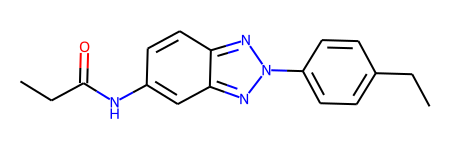

In [10]:
initial_mol[0]

In [11]:
first_structure_similarity = get_similarity(initial_mol[0], standarized_mols)

In [12]:
max(first_structure_similarity)

0.29185185185185186

In [13]:
def get_similarity_lists_of_mols(mol_list, smi_list): #first list - mols, second smiles
    sim0 = mol_list
    sim1 = [Chem.MolFromSmiles(smiles) for smiles in smi_list]
    sim00 = [Chem.RDKFingerprint(x) for x in sim0]
    sim11 = [Chem.RDKFingerprint(x) for x in sim1]
    result = []
    for finger in sim00:
        for finger_2 in sim11:
            similarity = TanimotoSimilarity(finger,finger_2)
            result.append(similarity)
    return result

In [14]:
dataframe__ = get_similarity_lists_of_mols(initial_mol, standarized_mols)

In [15]:
dataframe = pd.DataFrame(dataframe__, columns=['Tanimoto similarity: generated structures with initial ROR-y activ distribution'])

MIN similarity: 0.17202072538860103
MAX similarity: 1.0


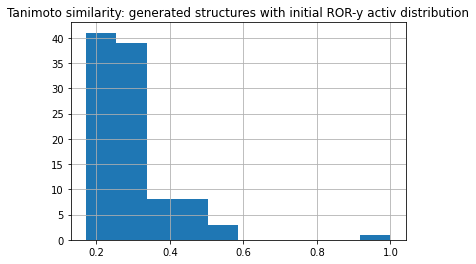

In [16]:
dataframe.hist()
print("MIN similarity: "+str(min(dataframe__)))
print("MAX similarity: "+str(max(dataframe__)))


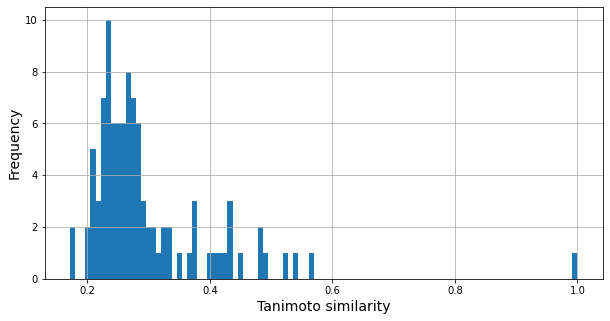

count    100.000000
mean       0.297244
std        0.109379
min        0.172021
25%        0.234439
50%        0.267045
75%        0.311089
max        1.000000
Name: Tanimoto similarity: generated structures with initial ROR-y activ distribution, dtype: float64


In [17]:
plt.figure(figsize=(10,5))
plt.hist(dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution'],bins=100)
plt.xlabel('Tanimoto similarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#plt.title('Histogram of Tanimoto similarity distribution')
plt.grid(True)
plt.show()

print(dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution'].describe())

In [18]:
print(dataframe[dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution']<0.02].index.values)

[]


In [19]:
dataframe[dataframe['Tanimoto similarity: generated structures with initial ROR-y activ distribution']<0.1].head()

,Tanimoto similarity: generated structures with initial ROR-y activ distribution


## Similarity among docked molecules

#docked_mols are at the beginning of the notebook

In [20]:
initial_docked_similarity = get_similarity_lists_of_mols([Chem.MolFromSmiles(smi) for smi in docked_mols], docked_mols)

In [21]:
dataframe_docked = pd.DataFrame(initial_docked_similarity, columns=['Tanimoto similarity among docked molecules distribution'])

MIN similarity: 0.17202072538860103
MAX similarity: 1.0


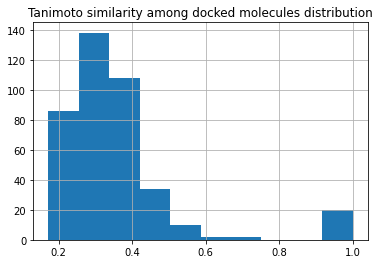

In [22]:
dataframe_docked.hist()
print("MIN similarity: "+str(min(initial_docked_similarity)))
print("MAX similarity: "+str(max(initial_docked_similarity)))

In [23]:
list_to_be_ = []
list_to_be_

[]

In [24]:
for mol in range(len(standarized_mols)): #comparision between generated mols
    simil = get_similarity(Chem.MolFromSmiles(standarized_mols[mol]), standarized_mols)
    list_to_be_.append(simil)

In [25]:
list_to_be_[0][0:5]

[1.0,
 0.3179384203480589,
 0.4188635032220269,
 0.5684438040345822,
 0.34578804347826086]

In [26]:
NEC = standarized_mols.copy()
KMV = standarized_mols.copy()

In [27]:
for elem in range(len(standarized_mols)):
    NEC[elem] = pd.DataFrame(list_to_be_[elem], columns=[standarized_mols[elem]])

In [28]:
frames = (NEC)

In [29]:
Final = pd.concat(frames, axis=1)
Final.head()

,CCC(=O)NCc1ccnn1[SH]1C=C(c2ccccc2F)NN1,CCC(=O)N1CC2C1CC2(C#N)S(=O)c1ccccn1,CCC(=O)N1c2ccn(-c3ncnc(C#N)c3C)c2[SH]1C,CCC(=O)NCc1ccnn1S1=C(C)NC(c2ccccc2F)=C1,CCC(=O)NCC1C(N)=NC1c1n[nH]cc1C(C)(C)O,CCC(=O)NCc1ccnn1S1=NNC(c2ccccc2F)=C1,Cc1cccc(C(=O)Cc2nc(Cl)cc3cccnc23)c1,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,Cc1cccc(C(=O)Cc2nc(Cc3ccco3)cs2)c1,CC(=O)Nc1cccc(C(=O)N2Cc3ccccc3Nc3nc(C)nc(c3F)NN=C2C#N)c1,CC(=O)Nc1cccc(C(=O)N(Cc2cccc3c2N2C(C)=NNC2N3)c2nnc(C)s2)c1,CC(=O)Nc1cccc(C(=O)NCC=CC2C=CN(C)C=C(F)C=NC=C2C)c1,CCC(=O)NCc1c2nc(Cc3n[nH]c(C)c3Cl)n1CC2,CCC(=O)NCC(F)c1nsc(-c2ccccn2)n1,CC1OCCN1Cc1nnc(-c2ccc(Br)cc2N)n1CO,CCCN1C(NC(=O)CC)C=CN1c1ncc(C#N)cc1C,CCC(=O)NC=CC(C)=NN([NH])c1c(F)cccc1Cl,Cc1cccc(C(=O)Cc2nc(Cc3ccoc3)cs2)c1,CC(=O)Nc1cccc(C(=O)N2NC(F)=NNCC3C2Cc2cccc(CN)c2N3C)c1,CCC1=NCCc2cncn2-c2cc(F)ccc2CCN(C(=O)c2cccc(NC(C)=O)c2)NN1
0,1.000000,0.317938,0.418864,0.568444,0.345788,0.645528,0.281760,0.267134,0.258278,0.387461,0.395195,0.260569,0.363758,0.285084,0.347619,0.357049,0.235390,0.242176,0.405615,0.383832
1,0.317938,1.000000,0.395882,0.338365,0.338877,0.307081,0.285296,0.247431,0.264079,0.361006,0.397664,0.234290,0.328198,0.272455,0.334254,0.345151,0.220381,0.247494,0.373882,0.352642
2,0.418864,0.395882,1.000000,0.461495,0.398007,0.419053,0.336155,0.274953,0.309789,0.457127,0.500000,0.275905,0.421237,0.312805,0.389860,0.428406,0.232246,0.291147,0.496743,0.469783
3,0.568444,0.338365,0.461495,1.000000,0.372675,0.572767,0.308256,0.269367,0.279261,0.433233,0.463443,0.282252,0.393766,0.300613,0.357868,0.378261,0.245185,0.261050,0.469006,0.442795
4,0.345788,0.338877,0.398007,0.372675,1.000000,0.343475,0.302651,0.231603,0.247576,0.353234,0.396457,0.255286,0.347063,0.273810,0.326057,0.345080,0.211256,0.244275,0.399396,0.368118


In [30]:
Final['CCC(=O)NCc1ccnn1[SH]1C=C(c2ccccc2F)NN1'][0]

1.0

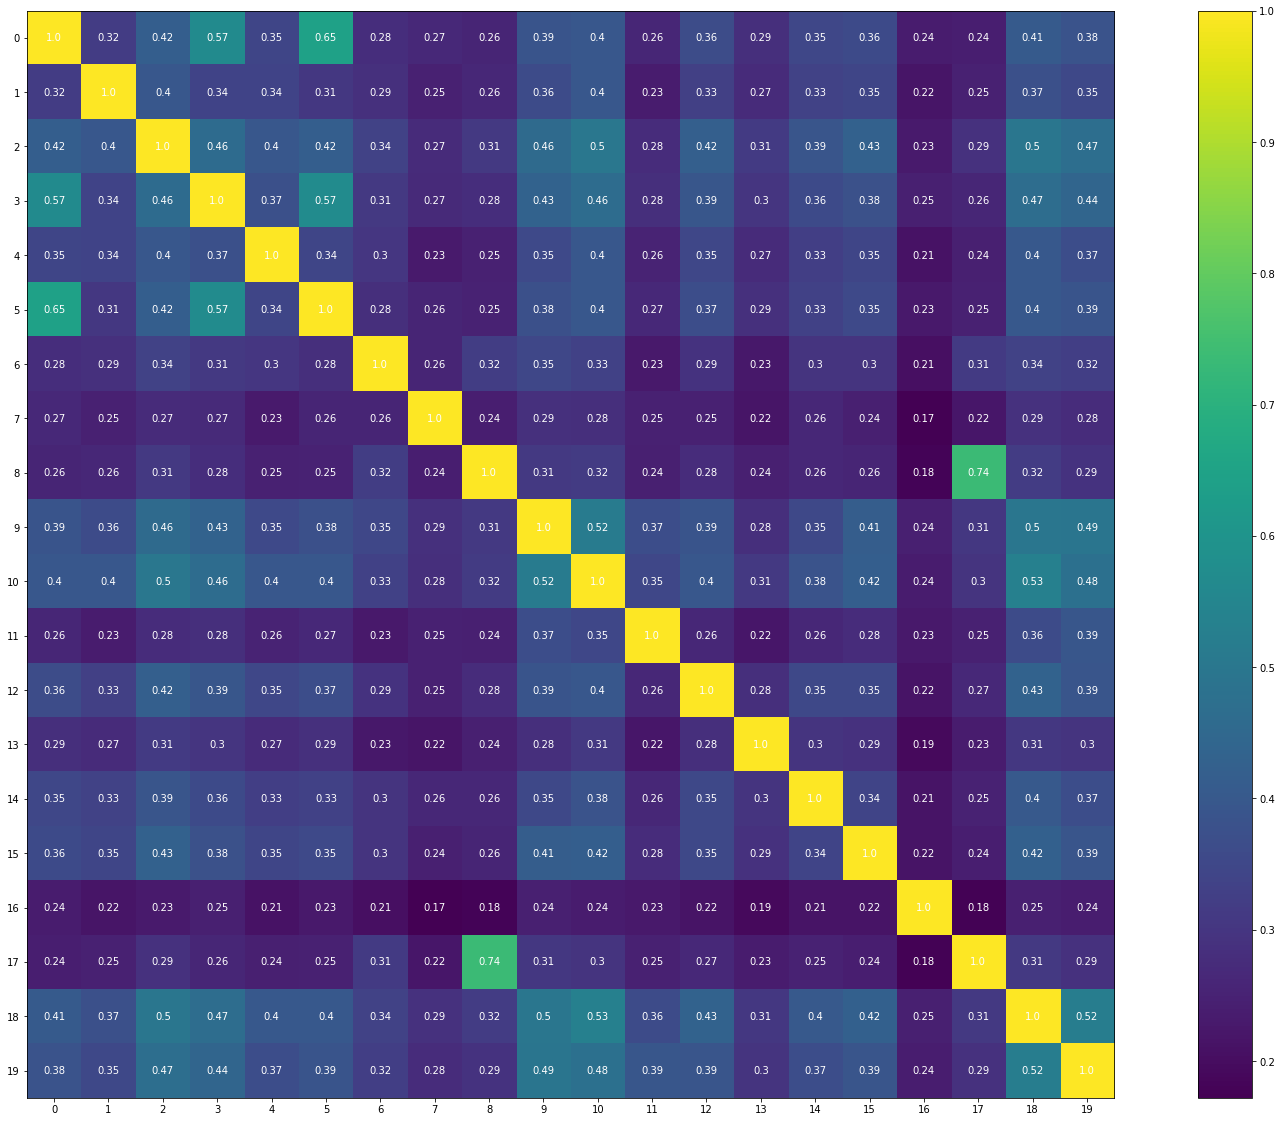

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 20))
plt.imshow(Final, interpolation='nearest')
ax = plt.gca()
ax.set_xticks(range(0,len(standarized_mols),1))
ax.set_yticks(range(0,len(standarized_mols),1))
plt.colorbar()
stg = Final.columns.values.tolist()
for i in range(len(standarized_mols)):
    for j in range(len(standarized_mols)):
        text = ax.text(j, i, round(Final[stg[i]][j],2), ha="center", va="center", color="w")
plt.show()

In [32]:
Final

,CCC(=O)NCc1ccnn1[SH]1C=C(c2ccccc2F)NN1,CCC(=O)N1CC2C1CC2(C#N)S(=O)c1ccccn1,CCC(=O)N1c2ccn(-c3ncnc(C#N)c3C)c2[SH]1C,CCC(=O)NCc1ccnn1S1=C(C)NC(c2ccccc2F)=C1,CCC(=O)NCC1C(N)=NC1c1n[nH]cc1C(C)(C)O,CCC(=O)NCc1ccnn1S1=NNC(c2ccccc2F)=C1,Cc1cccc(C(=O)Cc2nc(Cl)cc3cccnc23)c1,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,Cc1cccc(C(=O)Cc2nc(Cc3ccco3)cs2)c1,CC(=O)Nc1cccc(C(=O)N2Cc3ccccc3Nc3nc(C)nc(c3F)NN=C2C#N)c1,CC(=O)Nc1cccc(C(=O)N(Cc2cccc3c2N2C(C)=NNC2N3)c2nnc(C)s2)c1,CC(=O)Nc1cccc(C(=O)NCC=CC2C=CN(C)C=C(F)C=NC=C2C)c1,CCC(=O)NCc1c2nc(Cc3n[nH]c(C)c3Cl)n1CC2,CCC(=O)NCC(F)c1nsc(-c2ccccn2)n1,CC1OCCN1Cc1nnc(-c2ccc(Br)cc2N)n1CO,CCCN1C(NC(=O)CC)C=CN1c1ncc(C#N)cc1C,CCC(=O)NC=CC(C)=NN([NH])c1c(F)cccc1Cl,Cc1cccc(C(=O)Cc2nc(Cc3ccoc3)cs2)c1,CC(=O)Nc1cccc(C(=O)N2NC(F)=NNCC3C2Cc2cccc(CN)c2N3C)c1,CCC1=NCCc2cncn2-c2cc(F)ccc2CCN(C(=O)c2cccc(NC(C)=O)c2)NN1
0,1.000000,0.317938,0.418864,0.568444,0.345788,0.645528,0.281760,0.267134,0.258278,0.387461,0.395195,0.260569,0.363758,0.285084,0.347619,0.357049,0.235390,0.242176,0.405615,0.383832
1,0.317938,1.000000,0.395882,0.338365,0.338877,0.307081,0.285296,0.247431,0.264079,0.361006,0.397664,0.234290,0.328198,0.272455,0.334254,0.345151,0.220381,0.247494,0.373882,0.352642
2,0.418864,0.395882,1.000000,0.461495,0.398007,0.419053,0.336155,0.274953,0.309789,0.457127,0.500000,0.275905,0.421237,0.312805,0.389860,0.428406,0.232246,0.291147,0.496743,0.469783
3,0.568444,0.338365,0.461495,1.000000,0.372675,0.572767,0.308256,0.269367,0.279261,0.433233,0.463443,0.282252,0.393766,0.300613,0.357868,0.378261,0.245185,0.261050,0.469006,0.442795
4,0.345788,0.338877,0.398007,0.372675,1.000000,0.343475,0.302651,0.231603,0.247576,0.353234,0.396457,0.255286,0.347063,0.273810,0.326057,0.345080,0.211256,0.244275,0.399396,0.368118
5,0.645528,0.307081,0.419053,0.572767,0.343475,1.000000,0.283286,0.257121,0.249818,0.375697,0.397121,0.268105,0.368704,0.287601,0.333557,0.354754,0.229284,0.248507,0.400000,0.387651
6,0.281760,0.285296,0.336155,0.308256,0.302651,0.283286,1.000000,0.258897,0.323322,0.348383,0.331021,0.229974,0.294452,0.226656,0.297872,0.297753,0.205152,0.311993,0.335621,0.324781
7,0.267134,0.247431,0.274953,0.269367,0.231603,0.257121,0.258897,1.000000,0.243167,0.285815,0.282017,0.247752,0.248858,0.217937,0.264916,0.243666,0.172021,0.223394,0.291639,0.278136
8,0.258278,0.264079,0.309789,0.279261,0.247576,0.249818,0.323322,0.243167,1.000000,0.310179,0.316993,0.243697,0.277984,0.243313,0.262642,0.256815,0.179786,0.735632,0.318504,0.292244
9,0.387461,0.361006,0.457127,0.433233,0.353234,0.375697,0.348383,0.285815,0.310179,1.000000,0.517782,0.368382,0.385812,0.284016,0.351553,0.414680,0.244203,0.305750,0.496183,0.493695


## Checking if the data created is very similar to training data

In [33]:
whole_data_set = pd.read_parquet('../model/data/zinc20_selected_to_create_model_processed.parquet')

In [34]:
whole_data_set.head()

,index,smiles,SELFIES,SELFIES_length,SMILES_canonical,SELFIES_canonical,SELFIES_length_canonical
0,563932204,CNC(=O)CCCN1CCN(S(C)(=O)=O)[C@@H](C)C1,[C][N][C][=Branch1][C][=O][C][C][C][N][C][C][N...,30,CNC(=O)CCCN1CCN(S(C)(=O)=O)C(C)C1,[C][N][C][=Branch1][C][=O][C][C][C][N][C][C][N...,30
1,51885268,O=C(Cn1cc([N+](=O)[O-])cn1)N1CC[C@@H](CO)C1,[O][=C][Branch1][S][C][N][C][=C][Branch1][=Bra...,30,O=C(Cn1cc([N+](=O)[O-])cn1)N1CCC(CO)C1,[O][=C][Branch1][S][C][N][C][=C][Branch1][=Bra...,30
2,1099938503,COCCCN1CC[C@@H](NC(=O)c2cnco2)[C@H](O)C1,[C][O][C][C][C][N][C][C][C@@H1][Branch1][=N][N...,30,COCCCN1CCC(NC(=O)c2cnco2)C(O)C1,[C][O][C][C][C][N][C][C][C][Branch1][=N][N][C]...,30
3,1368537405,C[C@@H](O)CNC[C@H]1CN(C(=O)Cc2cnc[nH]2)CCO1,[C][C@@H1][Branch1][C][O][C][N][C][C@H1][C][N]...,30,CC(O)CNCC1CN(C(=O)Cc2cnc[nH]2)CCO1,[C][C][Branch1][C][O][C][N][C][C][C][N][Branch...,30
4,1379339000,C[C@H](CNCc1cn(C)nn1)NC(=O)COCC1CC1,[C][C@H1][Branch1][=C][C][N][C][C][=C][N][Bran...,30,CC(CNCc1cn(C)nn1)NC(=O)COCC1CC1,[C][C][Branch1][=C][C][N][C][C][=C][N][Branch1...,30


## Training was done on 121,000 of molecules
### Tanimoto simalirity distribution among newly generated and trained SMILES

In [35]:
whole_data_set = whole_data_set['SMILES_canonical']

In [36]:
len(whole_data_set)

121000

In [37]:
whole_data_set_smi = [Chem.MolFromSmiles(smi) for smi in whole_data_set]

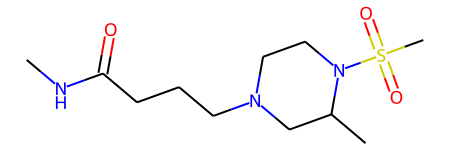

In [38]:
whole_data_set_smi[0]

In [39]:
#isomeric SMILES to canonical SMILES
whole_data_set_smi_cannonical = []
for mol in whole_data_set_smi:
    cannonical = Chem.MolToSmiles(mol, isomericSmiles=False)
    whole_data_set_smi_cannonical.append(cannonical)
whole_data_set_smi_cannonical[0:3]

['CNC(=O)CCCN1CCN(S(C)(=O)=O)C(C)C1',
 'O=C(Cn1cc([N+](=O)[O-])cn1)N1CCC(CO)C1',
 'COCCCN1CCC(NC(=O)c2cnco2)C(O)C1']

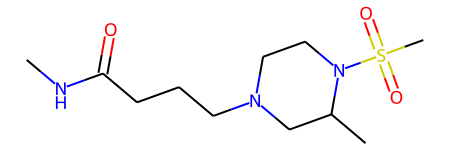

In [40]:
whole_data_set_smi[0]

In [41]:
whole_data_set_smi_cannonical[0]

'CNC(=O)CCCN1CCN(S(C)(=O)=O)C(C)C1'

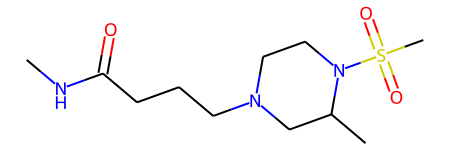

In [42]:
whole_data_set_smi_cannonical_mol = [Chem.MolFromSmiles(smi) for smi in whole_data_set_smi_cannonical]
whole_data_set_smi_cannonical_mol[0]

In [43]:
df = get_similarity_lists_of_mols(whole_data_set_smi_cannonical_mol, docked_mols) #second param as list of SMILES

In [44]:
dataframe_train = pd.DataFrame(df, columns=['Tanimoto simalirity distribution among newly generated and trained SMILES'])

MIN similarity: 0.023952095808383235
MAX similarity: 0.6454682023034551


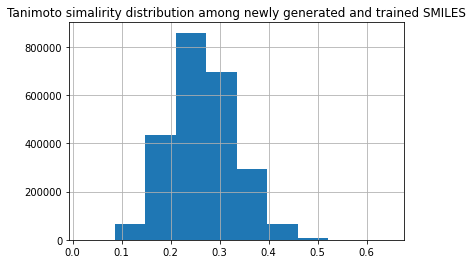

In [45]:
dataframe_train.hist()
print("MIN similarity: "+str(min(df)))
print("MAX similarity: "+str(max(df)))

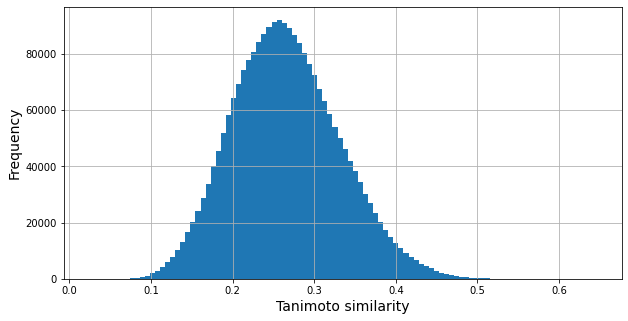

count    2.420000e+06
mean     2.657276e-01
std      6.570245e-02
min      2.395210e-02
25%      2.190476e-01
50%      2.622821e-01
75%      3.087379e-01
max      6.454682e-01
Name: Tanimoto simalirity distribution among newly generated and trained SMILES, dtype: float64


In [46]:
plt.figure(figsize=(10,5))
plt.hist(dataframe_train['Tanimoto simalirity distribution among newly generated and trained SMILES'],bins=100)
plt.xlabel('Tanimoto similarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#plt.title('Histogram of Tanimoto similarity distribution')
plt.grid(True)
plt.show()

print(dataframe_train['Tanimoto simalirity distribution among newly generated and trained SMILES'].describe())

In [47]:
new_ = dataframe_train[dataframe_train['Tanimoto simalirity distribution among newly generated and trained SMILES']>0.5]

In [48]:
len(new_['Tanimoto simalirity distribution among newly generated and trained SMILES'])

888

## Check if initial SMILES is present in PUBCHEM database (ROR-gamma active)

In [49]:
def find_smiles_in_PUBCHEM(smiles):
    compounds = []
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        compounds.append(compound)
    except:
        print("Not found : "+ str(smiles))
    return compounds

In [50]:
test_if_initial_data_can_be_found = [find_smiles_in_PUBCHEM(smiles) for smiles in initial_smi['SMILES']]

In [51]:
len(test_if_initial_data_can_be_found)

5

In [52]:
test_if_initial_data_can_be_found

[[[Compound(807146)]],
 [[Compound(16445174)]],
 [[Compound(71470549)]],
 [[Compound(71811962)]],
 [[Compound(135337558)]]]

## Check if newly generated SMILES is present in PUBCHEM database

In [53]:
test_if_newly_generated_data_can_be_found = [find_smiles_in_PUBCHEM(smiles) for smiles in to_check_in_PUBCHEM]

Not found : CCC(=O)NCc1ccnn1[SH]1C=C(c2ccccc2F)NN1
Not found : CCC(=O)N1c2ccn(-c3ncnc(C#N)c3C)c2[SH]1C


In [54]:
test_if_newly_generated_data_can_be_found

[[],
 [[Compound()]],
 [],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound(16445174)]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]],
 [[Compound()]]]

In [55]:
smiles_found_in_pubchem = []
for i in range(len(test_if_newly_generated_data_can_be_found)):
    try:
        smiles_found_in_pubchem.append(test_if_newly_generated_data_can_be_found[i][0][0].canonical_smiles)
    except:
        pass
smiles_found_in_pubchem_1 = []
for val in smiles_found_in_pubchem:
    if val != None :
        smiles_found_in_pubchem_1.append(val)
smiles_found_in_pubchem_1

['CC1=CC(=CC=C1)C(=O)NC2=CC(=NO2)C3=CC=CC=C3']